# Mapa interativo
## Localização de Airbnb no Rio de Janeiro.

## 1) Problema de negócio
Este projeto tem como objetivo, desenvolver um mapa interativo, do qual terá a localização de pontos  de airbnb distribuidos, na figura. O mapa terá funcionalidades das quais ao inferir informações específicas do usuário, ele irá mostrar as opções mais adequadas.

### Objetivo

Criar um Geodataframe para visualizar a interseção dos dados. Verificar como os pontos dos airbnb estão distribuidos no mapa do Rio de Janeiro, e realizar os devidos tratamentos.

In [1]:
!pip install descartes

## Bibliotecas necessárias

In [2]:
#Ler as bibliotecas necessárias
import geopandas as gpd
from geopandas.tools import sjoin
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString, Polygon
import pandas as pd

## 2) Carregando o Dataset



In [4]:
data_airbnb = pd.read_csv('/content/dados.csv')

### Este primeiro momento será destinado a criação do Geodataframe com o ocnjunto de dados airbnb_Rio.

In [5]:
#Visualizar as colunas dos dados airbnb_Rio
data_airbnb.columns

Index(['Unnamed: 0', 'host_is_superhost', 'host_listings_count', 'latitude',
       'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'extra_people', 'minimum_nights', 'instant_bookable', 'ano', 'mes',
       'n_amenities', 'property_type_Apartment',
       'property_type_Bed and breakfast', 'property_type_Condominium',
       'property_type_Guest suite', 'property_type_Guesthouse',
       'property_type_Hostel', 'property_type_House', 'property_type_Loft',
       'property_type_Outros', 'property_type_Serviced apartment',
       'room_type_Entire home/apt', 'room_type_Hotel room',
       'room_type_Private room', 'room_type_Shared room', 'bed_type_Outros',
       'bed_type_Real Bed', 'cancellation_policy_flexible',
       'cancellation_policy_moderate', 'cancellation_policy_strict',
       'cancellation_policy_strict_14_with_grace_period', 'price'],
      dtype='object')

Sabe-se que basicamente um Geodataframe, segue a mesma estrutura de um conjunto de dados pandas. Porém com uma coluna específica, a **geometry**. Realizaremos a criação dessa coluna e preencheremos a coluna com dados do tipo Point originado das colunas **latitude** e **longitude**.

In [21]:
#Criação da coluna geometry, e preenchendo com as coordenadas.
geometry = [Point(xy) for xy in zip(data_airbnb['longitude'], data_airbnb['latitude'])]
#Criando o GeoDataframe
gdf_Rio_de_Janeiro = gpd.GeoDataFrame(data_airbnb, geometry=geometry)


In [22]:
#Visualizando os dados para a verificação dos dados
gdf_Rio_de_Janeiro.head(5)

,Unnamed: 0,host_is_superhost,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,extra_people,...,room_type_Private room,room_type_Shared room,bed_type_Outros,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,price,geometry
0,1,1,2.0,-22.965919,-43.178962,5,1.0,2.0,2.0,51.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,270.0,POINT (-43.17896 -22.96592)
1,3,0,3.0,-22.977117,-43.190454,3,1.0,1.0,2.0,45.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,161.0,POINT (-43.19045 -22.97712)
2,4,1,1.0,-22.983024,-43.214270,3,1.0,1.0,2.0,68.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,222.0,POINT (-43.21427 -22.98302)
3,5,1,1.0,-22.988165,-43.193588,3,1.5,1.0,2.0,86.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,308.0,POINT (-43.19359 -22.98816)
4,6,1,1.0,-22.981269,-43.190457,2,1.0,1.0,2.0,80.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,219.0,POINT (-43.19046 -22.98127)


Como podemos ver, é a mesma estrutura de um DataFrame Pandas. Portanto, daremos prosseguimento as análises.

In [23]:
#Verificação do tipo dos dados
type(gdf_Rio_de_Janeiro)

geopandas.geodataframe.GeoDataFrame

Para começar, vamos visualizar como os dados estão distribuidos. Faremos isso utilizando matplotlib.

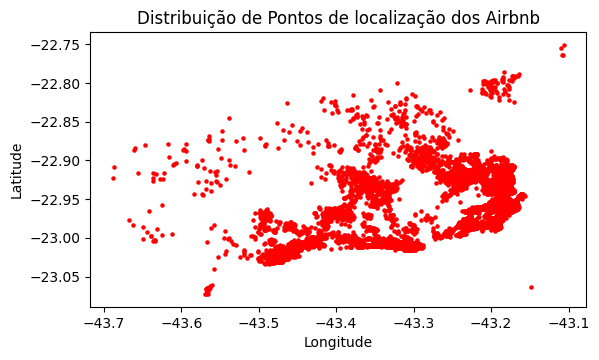

In [10]:
gdf_Rio_de_Janeiro.plot(marker='o', color='red', markersize=5)
plt.title('Distribuição de Pontos de localização dos Airbnb')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Dando Prosseguimento, partiremos para a mesclagem dos dados. Nesta etapa, vamos realizar o plot da interseção das duas figuras. Neste caso, os pontos airbnb com os dados Geospaciais do Rio de Janeiro.

## 3) Interseção entre as Geometrias

Para realizar a interseção dos dados, é necessário que além dos dados dos airbnbs, tenhamos tambem os dados Geospaciais do Rio de Janeiro. Para que assim possamos ver onde os airbnb estão localizados e possamos realizar algum tipo de tratamento caso precise.

In [14]:
#Leitura dos dados Geospaciais
filename = '/content/Rj_airbnb_Geo.json'
geo_data_municipios = gpd.read_file(filename, drive = "GeoJSON")

In [24]:
#Verificando as colunas do dataset
geo_data_municipios.columns

Index(['CD_MUN', 'NM_MUN', 'SIGLA_UF', 'AREA_KM2', 'geometry'], dtype='object')

In [25]:
#Visualizando as 5 primeiras linhas
geo_data_municipios.head()

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,3300100,Angra dos Reis,RJ,813.420,"MULTIPOLYGON (((-44.51649 -23.03589, -44.51633..."
1,3300159,Aperibé,RJ,94.542,"POLYGON ((-42.11437 -21.61204, -42.11394 -21.6..."
2,3300209,Araruama,RJ,638.276,"POLYGON ((-42.28399 -22.93928, -42.28444 -22.9..."
3,3300225,Areal,RJ,110.724,"POLYGON ((-43.09004 -22.23844, -43.09135 -22.2..."
4,3300233,Armação dos Búzios,RJ,70.977,"MULTIPOLYGON (((-41.91872 -22.77162, -41.91854..."


Agora que temos tanto os dados dos airbnb quanto os dados Geospaciais dos municipios do Rio de Janeiro, já podemos realizar a plotagem dos dados para verificar como estão distribuido os pontos airbnb no mapa geospacial do estado do Rio de Janeiro.

<Axes: >

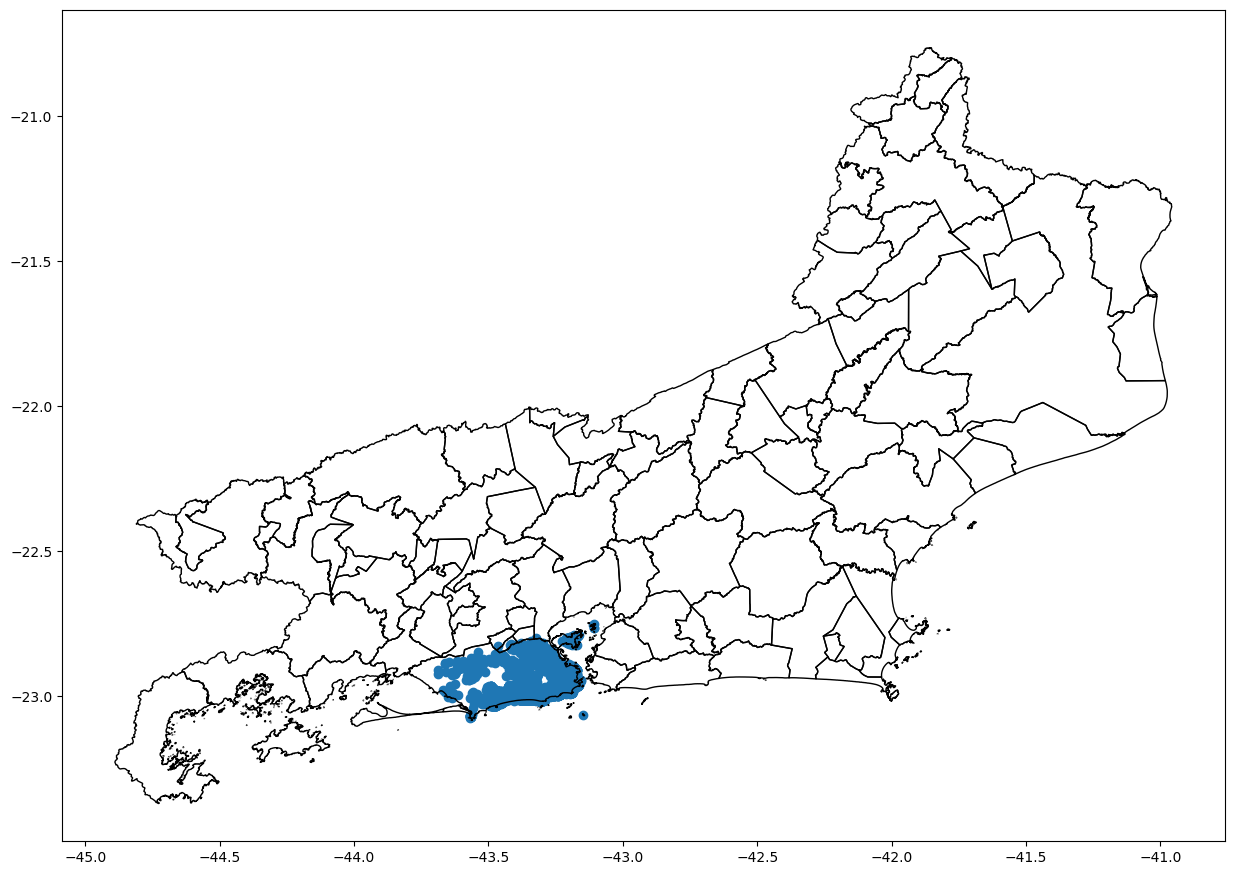

In [27]:
#Plotando a interseção dos dados.
fig, ax = plt.subplots(figsize = (15,15))
gdf_Rio_de_Janeiro.plot(ax=ax)
geo_data_municipios.plot(ax=ax, facecolor = 'None', edgecolor = 'black')

## Pontos importantes

### 1) Origem dos dados

Na coleta dos dados, não tinha informação sobre como os pontos estariam distribuidos, por exemplo: se as observações no dataset estariam presentes em toda a região, ou em apenas em municipios específicos, Zona Leste, Oeste etc... O mapa acima claramente mostra a concentração dos dados em apenas um municipio.

### 2) Identificação do Municipio

Visto que os dados estavam distribuidos em apenas um Municipio, realizei uma buca através das coordenadas disponíveis no conjunto de dados, na ferramenta Google Maps, pois assim, identificando a lozalização de um airbnb, estaria localizando grande parte dos pontos dos dados, se não todos.

-  Dito isso, vi que um dos pontos estava localizado no bairro Copa cabana que por ventura fica situado no municipio de Rio de Janeiro. O que facilitou bastante esse trabalho.

### Melhorando a visualização dos dados

Primeiro, pregaremos o polygono do municipio do Rio de Janeiro.

In [18]:
data_rj = gpd.read_file("/content/captal_do_Rio_de_Janeiro.json")
data_rj

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,3304557,Rio de Janeiro,RJ,1200.329,"MULTIPOLYGON (((-43.66048 -22.99958, -43.66050..."


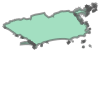

In [29]:
#Pegar o polygon do municipio do Rio de Janeiro
polygon_Rj = data_rj.iloc[0].geometry
polygon_Rj

In [35]:
#Realizar a operação de Interseção das geometrias
aibnb_municipio_RJ = gdf_Rio_de_Janeiro[gdf_Rio_de_Janeiro.intersects(polygon_Rj)]


<Axes: >

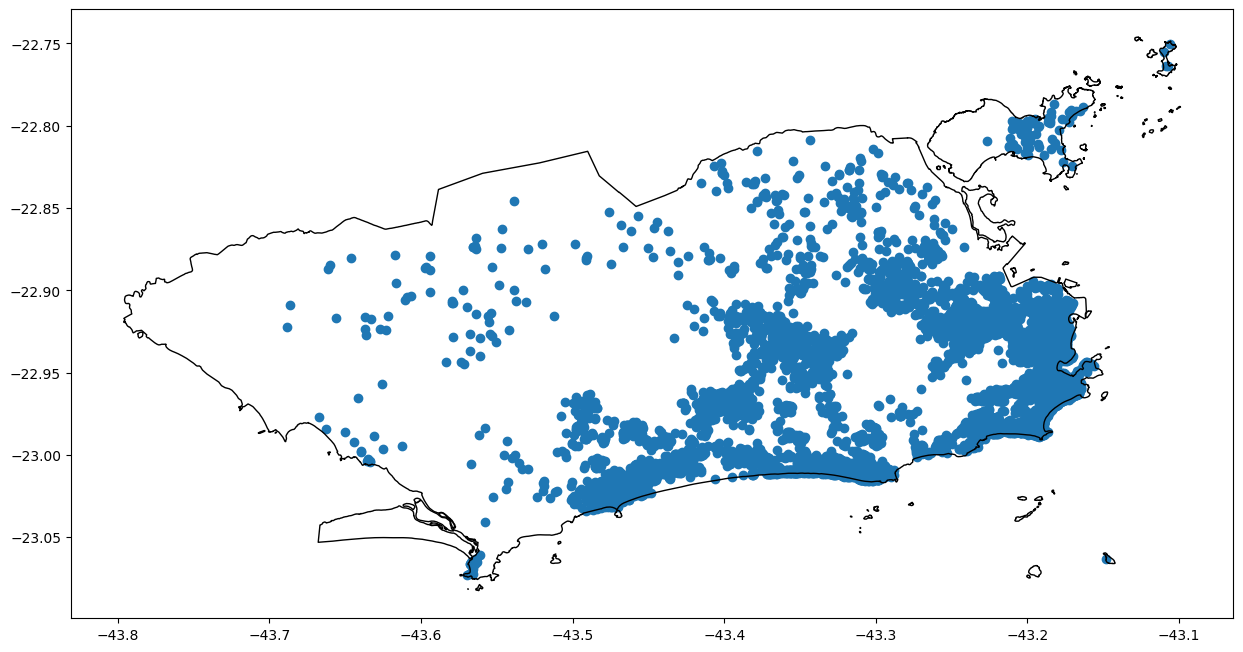

In [37]:
#Plotando a interseção dos dados
fig, ax = plt.subplots(figsize = (15,15))
aibnb_municipio_RJ.plot(ax=ax)
data_rj.plot(ax=ax, facecolor = 'None', edgecolor = 'black')

O gráfico acima mostra a distribuição dos Points, airbnb distribuidos no municipio Rio de Janeiro. Agora que sabemos a distribuição dos dados, basta salvar o arquivo e produzir o gráfico.

In [38]:
#Salvando os dados com as interseções
filename = 'airbnb_municipio_RJ'

aibnb_municipio_RJ.to_file(filename, driver = 'GeoJSON')